<a href="https://colab.research.google.com/github/Ghislainniyongabo/group4-DS-Assignment_03/blob/master/Group4_DS_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group 4 Assignment 

Joseph Owuor Owino (josephowino@aims.ac.za)

Linda Agyapomah Agyare (lindaagyapomah@aims.ac.za)

Nedjla Tazdait (nedjla@aims.ac.za)

Roger Jeasy Bavibidila (roger@aims.ac.za)

Sitraka Nandrianina Tolojanahary (sitraka@aims.ac.za)

Ghislain Niyongabo (ghislainniyongabo@aims.ac.za)

### Mortgage Dataset:

We worked on the Mortagage Approval Dataset. The goal of this problem is to predict whether a mortagage application will be accepted or denied according to some factors depending on both the lender and the applicant. Some of these factors are loan amount, loan type, loan purpose, occupancy, amongst others. In all there are 21 feature variables and two outputs (i.e whether an application was accepted or denied) and hence this is a binary classifiaction Problem.

We obtained the dataset from Fedral Financial Instituitions Examination Council's(FFIEC). The Council is a formal interagency body empowered to prescribe uniform principles, standards, and report forms for the federal examination of financial institutions by the Board of Governors of the Federal Reserve System (FRB), the Federal Deposit Insurance Corporation (FDIC), the National Credit Union Administration (NCUA), the Office of the Comptroller of the Currency (OCC), and the Consumer Financial Protection Bureau (CFPB), and to make recommendations to promote uniformity in the supervision of financial institutions. 




## Understanding the problem - Data Perspective

The data provided can be grouped into the following subjects

$\bullet$ Location describes the State, metro area and census tract of the property

$\bullet$ Property Type describes the Property Type and Occupancy of the property.Property type values include One-to-four family dwelling,Manufactured housing and Multifamily dwelling. This also answers the question “Will the owner use the property as their primary residence ?” . The values include Owner occupied as principal dwelling , Not owner occupied as principal dwelling and Not Applicable.

$\bullet$ Loan describes the action taken on the Loan, purpose of the Loan , Type of the loan ,Loan’s lien status.

$\bullet$ Lender describes the lender associated with the loan and the Federal agency associated with the loan.

$\bullet$ Applicant describes the demographic information for the applicants and the co-applicants.This has the applicant sex , co- applicant sex , applicant race and ethnicity, co- applicant race and ethnicity

The data being used in the problem is used to determine if is to predict whether a mortagage application will be accepted or denied. 

The dataset has two different tables including "Features" table and "Target or labels" table. This lead us to conclude that we are dealing with a binary classification and therefore we made a decision to use Logistic regression. 

# Logistic Regreesion Model

Logistic regression is a linear model but with a nonlinear response. The response is binary, $\{ 0,1 \}$, or positive and negative. The response is the prediction of the category. Our target variable is composed by two unique classes reason why we are dealing with binary classification and binary logistic regression was chosen for this problem .

Properties of Logistic Regression:

$\bullet$ The dependent variable in logistic regression follows Bernoulli Distribution.

$\bullet$ Estimation is done through maximum likelihood.

$\bullet$ No R Square, Model fitness is calculated through Concordance, KS-Statistics.

In this notebook report we will discuss the following: 
-  Data preparation and preprocessing using scikit-learn.
-  The underpinning mathematics behind Logistic regression model (This was incorporated in this notebook and done at most of the important steps if the  model ).
-  Construction of a Logistic regression model using scikit-learn.
-  Evaluating the performance of the Logistic regression model. 
-  Using techniques such as reweighting the labels and changing the decision threshold to change the trade-off b      between false positive and false negative error rates. 

# Import libraries

In [0]:
#import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns

import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

from keras.models import Sequential # # This indicate that whene adding addition layers, the sequence should go from the left to the right
from keras.layers import Dense # This enable the full connected layers
import numpy as np  # Import numpy libraries 
import matplotlib.pyplot as plt # For ploting the performance
from keras.utils import np_utils  # This a keras library which enables the one hot encoding
from sklearn.metrics import accuracy_score, confusion_matrix  # a sklearn functions that enables the computation of the accuracy and the plotting of the confusion matrix
from sklearn.model_selection import train_test_split  # This a function that enables to split the dataset into separate data such as training, validation and test data
from keras.utils import to_categorical # to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector
from sklearn.preprocessing import StandardScaler # This a function used in scaling the data
from sklearn.preprocessing import LabelEncoder #for encoding the levels of categorical features into numeric values
import pandas as pd # Python library for data analysis
from sklearn import preprocessing

from keras.models import model_from_json

%matplotlib inline

%tensorflow_version 1.x

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
 link1='https://drive.google.com/open?id=1JrPu5ulLN_wr_CoS7XiJxcz9-OMiJ20L'

In [361]:
fluff, id1 = link1.split('=')
print (id1) # Verify that you have everything after '='

1JrPu5ulLN_wr_CoS7XiJxcz9-OMiJ20L


In [0]:
link2='https://drive.google.com/open?id=1aqIWGFsf6PXXGxXxRLx_NyvSQg_AUzVs'

In [363]:
fluff, id2 = link2.split('=')
print (id2) # Verify that you have everything after '='

1aqIWGFsf6PXXGxXxRLx_NyvSQg_AUzVs


### We now  load and prepare the dataset.

In [0]:
downloaded1 = drive.CreateFile({'id':id1}) 
downloaded1.GetContentFile('Filename.csv')  
dataset1 = pd.read_csv('Filename.csv')

downloaded2 = drive.CreateFile({'id':id2}) 
downloaded2.GetContentFile('Filename.csv')  
dataset = pd.read_csv('Filename.csv')
#dataset1=pd.read_csv("mortgage-loan-approval/train_labels.csv") 

In [365]:
dataset1.shape

(500000, 2)

In [366]:
dataset.shape

(500000, 22)

## View the feature table

In [239]:
dataset.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


# Viewing the labels

In [240]:
dataset1.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [241]:
dataset.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant'],
      dtype='object')

In [242]:
dataset['property_type'].unique()

array([1, 2, 3])

### checking the number of missing values

In [243]:
dataset1.isnull().sum() 

row_id      0
accepted    0
dtype: int64

In [0]:
target=dataset1['accepted']

In [245]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: accepted, dtype: int64

## Merging the features and the target in one dataset 

In [0]:
dataset['accepted']=target

In [247]:
dataset.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [248]:
dataset.shape

(500000, 23)

In [249]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

##  Let's display basic statistical characteristics of each numerical feature. 

Remember that though the columns are initially columns, they were transformed in numerical. We do it by running the describe method and the code returns : the number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [338]:
dataset.describe()


,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,2.036228,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,0.500228
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,0.511351,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,2.000000,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,2.000000,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,2.000000,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,4.000000,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


In [340]:
dataset.describe(include=['object', 'bool']) # this code is for the features that are still categorical

,co_applicant
count,500000
unique,2
top,False
freq,299974


### Preprocessing the data:
We cleaned the data by removing missing data values.

In [341]:
dataset.isnull().sum() # here we show the missing data

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

This dataset contains some missing values. However, the rate is not significant therefore we can perform the dropout in order to remove them from the dataset as they will not affect the performance adversely.

# The code below removes all the missing data.

In [0]:
dataset_cleaned=dataset.dropna()

In [343]:
dataset_cleaned.isnull().sum()

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

###  Viewing the new shape of the dataset after cleaning 

In [344]:
dataset_cleaned.shape

(438255, 23)

In [345]:
dataset.accepted.value_counts()

1    250114
0    249886
Name: accepted, dtype: int64

#### Checking the Column Labels

In [346]:
for col in dataset_cleaned.columns: 
    print(col)     

row_id
loan_type
property_type
loan_purpose
occupancy
loan_amount
preapproval
msa_md
state_code
county_code
applicant_ethnicity
applicant_race
applicant_sex
applicant_income
population
minority_population_pct
ffiecmedian_family_income
tract_to_msa_md_income_pct
number_of_owner-occupied_units
number_of_1_to_4_family_units
lender
co_applicant
accepted


### Transforming the categorical data to numerical data:

Precisely setting the co-applicant values which is  boolean to zeros and ones. In this case True values are set to 1 and the false values are set to 0. The efficient way to transform the categorical data into numerical data is to use the **One hot encoding** but for this case the data was almost encoded expect for the column **"co_applicant".** Therefore we will use a simple way using the **loc function** in order to replace where the values is False by o and where the values is True by 1.

In [347]:
dataset_cleaned.loc[(dataset_cleaned.co_applicant == True),'co_applicant']=1
dataset_cleaned.loc[(dataset_cleaned.co_applicant == False),'co_applicant']=0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [348]:
dataset_cleaned.head() # viewing the first five observaions 

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0,1
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0,1
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1,1
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0,1


In [349]:
dataset_cleaned['loan_purpose'].unique()

array([1, 3, 2])

In [350]:
dataset_cleaned['property_type'].unique()

array([1, 2])

### Droping Redundant Columns:
We removed the columns that are not needed. Such are the applicant identifier column (row id) and applicant ethnicity. We observed that these features don't have any effect on an applicant being accepted or not.

In [0]:
dataset_cleaned=dataset_cleaned.drop(columns =['row_id']) 

In [0]:
dataset_cleaned=dataset_cleaned.drop(columns =['applicant_ethnicity']) 

In [353]:
dataset_cleaned.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,3,1,1,1,70.0,3,18,37,246,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0,1
1,1,1,3,1,178.0,3,369,52,299,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0,0
2,2,1,3,1,163.0,3,16,10,306,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0,1
3,1,1,1,1,155.0,1,305,47,180,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1,1
4,1,1,1,1,305.0,3,24,37,20,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0,1


In [0]:
target_count = dataset_cleaned.accepted.value_counts()

In [0]:
#dataset_cleaned['accepted'].value_counts(normalize=True)

In [355]:
dataset_cleaned['applicant_sex'].unique()

array([1, 2, 3, 4])

### Let us explore our target variable and visualize it for checking Whether the Classes are  Balanced or Imbalanced:


Class 0: 210208
Class 1: 228047
Proportion: 0.92 : 1
percentage of no accepted is 47.96476936943104
percentage of accepted 52.03523063056896


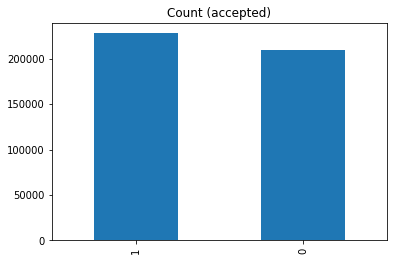

In [265]:
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_no_acc = len(dataset_cleaned[dataset_cleaned['accepted']==0])
count_acc = len(dataset_cleaned[dataset_cleaned['accepted']==1])
pct_of_no_acc = count_no_acc/(count_no_acc+count_acc)
print("percentage of no accepted is", pct_of_no_acc*100)
pct_of_acc = count_acc/(count_no_acc+count_acc)
print("percentage of accepted", pct_of_acc*100)

target_count.plot(kind='bar', title='Count (accepted)');


# Observations:

We observed that the classes are balanced since the proportion of the classes are 0.92 : 1. Moreover, Our classes are balanced, and the ratio of no-accepted to accepted instances is 47.96.


#### We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

### Plotting accepted against the race of the applicant.

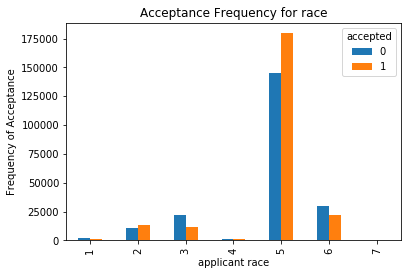

In [266]:
pd.crosstab(dataset_cleaned.applicant_race,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for race')
plt.xlabel('applicant race')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_applicant_race_bar')

The applicant race can be defined as following :
- 1 -- American Indian or Alaska Native
- 2 -- Asian
- 3 -- Black or African American
- 4 -- Native Hawaiian or Other Pacific Islander
- 5 -- White
- 6 -- Information not provided by applicant in mail, Internet, or telephone application
- 7 -- Not applicable
- 8 -- No co-applicant

From the graph we notice that the white people represente high frequency of acceptance. The American Indian or Alaska Native race have the lowest frequency close to 0.

### Plotting the frequence of accaptance against the sex of the applicant

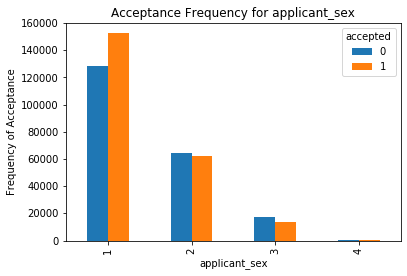

In [267]:
pd.crosstab(dataset_cleaned.applicant_sex,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for applicant_sex')
plt.xlabel('applicant_sex')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_applicant_sex_bar')

The feature sex are :
- 1 -- Male
- 2 -- Female
- 3 -- Information not provided by applicant in mail, Internet, or telephone application
- 4 -- Not applicable

The graph shows that the Acceptance frequency for male is higher compared to female almost the half.


In [0]:
#pd.crosstab(dataset_cleaned.lender,dataset_cleaned.accepted).plot(kind='bar')
#plt.title('Acceptance Frequency for lender')
#plt.xlabel('lender')
#plt.ylabel('Frequency of Accepted')
#plt.savefig('pur_fre_property_type_bar')

In [0]:
dataset_cleaned=dataset_cleaned.drop(columns =['lender']) 

### Plotting the frequence of accaptance against the property_type

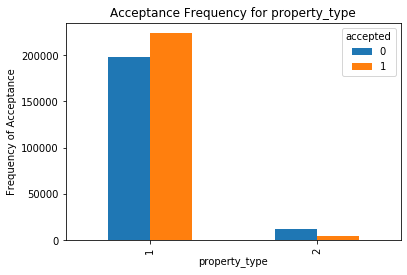

In [270]:
pd.crosstab(dataset_cleaned.property_type,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for property_type')
plt.xlabel('property_type')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_property_type_bar')

Acceptance Frequency for property_type:
- 1 -- One to four-family (other than manufactured housing)
- 2 -- Manufactured housing
- 3 -- Multifamily

From the graph we notice that we have just two property_type because we cleaned the data.

The Acceptance Frequency for the type "one to four family" is higher than the "Manufactured housing" which is close to 0.

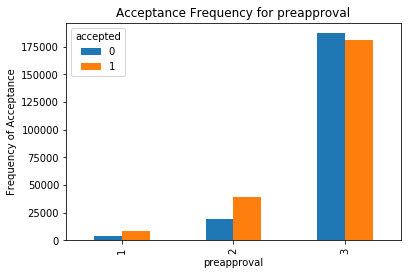

In [271]:
pd.crosstab(dataset_cleaned.preapproval,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for preapproval')
plt.xlabel('preapproval')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_preapproval_type_bar')

Preapproval:
- 1 -- Preapproval was requested
- 2 -- Preapproval was not requested
- 3 -- Not applicable

From the graph we notice that the Preapproval of the "not applicable" is higher than the "was not requested" characteristics and the "was requested" that is closed to zero.

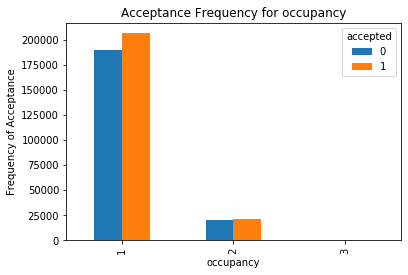

In [272]:
pd.crosstab(dataset_cleaned.occupancy,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for occupancy')
plt.xlabel('occupancy')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_occupancy_type_bar')

The feature of occupancy is characterized by :
- 1 -- Owner-occupied as a principal dwelling
- 2 -- Not owner-occupied
- 3 -- Not applicable

The first characteristic presents the highest frequency compared to the others characteristics. With that characteristic the accepted frequency is higher about 10000 than the denied.

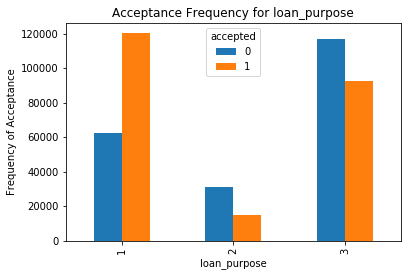

In [273]:
pd.crosstab(dataset_cleaned.loan_purpose,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for loan_purpose')
plt.xlabel('loan_purpose')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_loan_purpose_type_bar')

Loan-purposed:
- 1 -- Home purchase
- 2 -- Home improvement
- 3 -- Refinancingwith 

Here the "home purchase" and the "refinancing" characteristics presente almost the same frequency level, but with the "home purchase" the accepted are higher than the denied and inversly for the "refinancing".

In [274]:
for col in dataset_cleaned.columns: 
    print(col)     

loan_type
property_type
loan_purpose
occupancy
loan_amount
preapproval
msa_md
state_code
county_code
applicant_race
applicant_sex
applicant_income
population
minority_population_pct
ffiecmedian_family_income
tract_to_msa_md_income_pct
number_of_owner-occupied_units
number_of_1_to_4_family_units
co_applicant
accepted


# Observation

Part of the feature selection process, the above process was done in order to plot and visualize the level of dependency of the target variable "accepted" according to the independent categorical variables. Apparently, some features do not have much impact on the decision of approving the mortgage such as "lender", and therefore those features have been removed in the orediction process.

In [275]:
for col in dataset_cleaned.columns: 
    print(col)     

loan_type
property_type
loan_purpose
occupancy
loan_amount
preapproval
msa_md
state_code
county_code
applicant_race
applicant_sex
applicant_income
population
minority_population_pct
ffiecmedian_family_income
tract_to_msa_md_income_pct
number_of_owner-occupied_units
number_of_1_to_4_family_units
co_applicant
accepted


In [0]:
#dataset_cleaned=dataset_cleaned.drop(columns =['number_of_owner-occupied_units']) 
#dataset_cleaned=dataset_cleaned.drop(columns =['msa_md']) 
#dataset_cleaned=dataset_cleaned.drop(columns =['state_code']) 
#dataset_cleaned=dataset_cleaned.drop(columns =['preapproval']) 
#dataset_cleaned=dataset_cleaned.drop(columns =['occupancy'])

# Feature selection process

Feature selection can be done in multiple ways but there are broadly 3 categories of it:

1. Filter Method

2. Wrapper Method

3. Embedded Method

we used the Recursive Feature Elimination and backward elimination which are techniques used in wrapper method for selecting the features.


In [0]:
#corr = dataset_cleaned.corr()

In [0]:
#plt.figure(figsize=(15,10))
#sns.heatmap(corr)

###  Splitting the data into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [0]:
X= dataset_cleaned.drop(columns=['accepted'])
Y = dataset_cleaned['accepted']

 

In [287]:
X.shape # Viewing the shape after spliting

(438255, 14)

In [288]:
Y.shape

(438255,)

## 1. Recursive Feature Elimination

We will use RFE with the Logistic Regression classifier to select the top features

In [289]:
dataset_cleaned_vars=dataset_cleaned.columns.values.tolist()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, Y)
print("Feature selected: %s" %rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)
print("the number of features: %s" % rfe.n_features_)
#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Feature selected: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
the number of features: 14


Based on the test performed it is clear that most of the features have to participate in the prediction process. These are marked True in the support array and marked with a choice “1” in the ranking array. This, in turn, indicates the strength of these features. 

However, additional test can be done in order to select relavant features. 

## 2. Step Backwards Feature Selection


The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

In [290]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.646439
         Iterations 5
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.066      
Dependent Variable:      accepted             AIC:                  566638.4485
Date:                    2019-12-30 12:55     BIC:                  566792.3163
No. Observations:        438255               Log-Likelihood:       -2.8331e+05
Df Model:                13                   LL-Null:              -3.0341e+05
Df Residuals:            438241               LLR p-value:          0.0000     
Converged:               1.0000               Scale:                1.0000     
No. Iterations:          5.0000                                                
-------------------------------------------------------------------------------
                               Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [0]:
#!pip3 install mlxtend  

##### The p-values for most of the variables are smaller than 0.05, except one variable, therefore, we will remove it. This variable is "applicant_ethnicity"

#### After perfectly chosen the right features to use in this prediction, we proceeded in implementing the logistic model. However, 

#### we started by splitting the data into training and testing data in order to prepare and adapt the data to the system 

#### implementation.

###  Splitting the data into the training and testing data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


we split $80\%$ of the data into training set while $20\%$ of the data to test set using below code.

In [293]:
X_train.shape

(350604, 14)

In [294]:
Y_train.shape

(350604,)

In [295]:
X_test.shape

(87651, 14)

In [296]:
Y_test.shape

(87651,)

## Scaling the data. this process was performed in order to normalize the data

In [218]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:2,]

array([[ 1.02111381, -0.19475283,  0.99391477, -0.32702794, -0.23497574,
        -0.51941586,  0.23536504, -0.6907991 , -0.19073496, -0.18334384,
        -0.59748234, -1.13929136,  0.57037416, -0.45359604,  1.20285717],
       [-0.48793435, -0.19475283,  0.99391477, -0.32702794, -0.00541578,
         0.3615226 ,  0.23536504,  0.91531327, -0.02235118,  0.31664688,
        -0.67951939,  0.16925827,  0.57037416,  0.13198255,  1.20285717]])

# Building our Logistic model

### Logistic Regression process


Given a $data(X,Y)$, X being a matrix of values with m examples (19 in our case of study after selecting the best features) and n features and Y being a vector with m examples (1 target variable "accepted" in this particular problem). The objective is to train the model to predict which class the future values belong to. 


1. Primarily, we create a weight matrix with random initialization. Then we multiply it by features.


$$F1 = W_o + W_1X_1+ W_2X_2 + W_3X_3+....+ W_nX_n$$

2. We then pass the output obtained from Eq 1. to a link function.

$$F(\hat{y}i) = \frac{1}{1 + e^{-\kappa( \beta_0 + \beta_1\ x_1+....+\beta_n\ x_n)}} $$


3. This is followed by calculating the cost for that iteration whose formula is

$$cost(w)=(-1/m) \sum_{{i=1}}^{i=m} \hat{y}i \quad log(yi) + (1-yi) log (1-\hat{y}i) $$ 

4. The derivative of this cost is calculated following which the weights are updated.

$$dwj= \sum_{{i=1}}^{in} (\hat{y}-y)x^{i}_{j}$$

$$wi=wj-(\alpha * dwj)$$ 

$\implies$ For the update of the weights

However the Logistic regression model for solving this problem will be implemented by  Scikit-learn  in the given code below. This code will compute all the mathematics described above.
 


In [0]:
#### Instantiate the Logistic Regression model using default and use fit() function to train your model.

In [220]:
from sklearn.linear_model import LogisticRegression

logistic_mod1 = linear_model.LogisticRegression() 
logistic_mod=logistic_mod1.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Now, print and examine the model coefficients by executing the code in the cell below. 

In [221]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[0.09154001]
[[-0.05078161 -0.2674952  -0.47673442 -0.00395314  0.08594466 -0.01450463
   0.07734626 -0.07507446  0.05237797  0.12794033 -0.15037073  0.11722387
   0.10746693 -0.12610536  0.16547633]]


####  We notice that model coefficients look similar to that of a regression model. 

Recall that the logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). Execute the code and the cell below to compute and display a sample of these class probabilities for the test feature set. 

What logistic regression does is that it calculates a conditional probability.

1. Probability for class 1

$$P(Y=1|X;W)$$

2. Probability for class 0

$$P(Y=0|X;W)$$


In [222]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.55550552 0.44449448]
 [0.66688158 0.33311842]
 [0.39730105 0.60269895]
 [0.44088878 0.55911122]
 [0.70860041 0.29139959]
 [0.56662815 0.43337185]
 [0.51539252 0.48460748]
 [0.6281274  0.3718726 ]
 [0.7248241  0.2751759 ]
 [0.37549776 0.62450224]
 [0.45059725 0.54940275]
 [0.32765851 0.67234149]
 [0.66010235 0.33989765]
 [0.58789744 0.41210256]
 [0.64103948 0.35896052]]


 #### Logistic regression model outputs probabilities for each class. We take the class with the highest probability as the score (prediction).

In this case study, we deal with two classes 1 and 0. Therefore, the threshold is 0.5.

if $P(Y=0) > 0.5$ then obviously $P(Y=0) > P(Y=1)$. The same stands for the multiclass setting: again, it chooses the class with the biggest probability.

In [223]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores))
print(Y_test)

[0 0 1 ... 0 1 1]
226677    1
233210    0
442300    0
304317    0
204148    1
         ..
493326    1
149422    0
215887    1
154906    0
33764     1
Name: accepted, Length: 87651, dtype: int64


# Model Evaluation using Confusion Matrix

 **We use confusion matrix to evaluate the performance of our model by laying out the correctly and incorrectly classified cases in a tabular format** 

  There are various metrics derived from the values in the confusion matrix. We review some of the common cases below. 

**Confusion matrix**

For our binary case the confusion matrix is organized as follows:

| | **Scored Positive** | **Scored Negative**|  
|------|:------:|:------:| 
|**Actual Positive** | True Positive | False Negative |
|**Actual Negative**| False Positive | True Negative |   

Here the four elements in the matrix are defined as:    

$\bullet$ true positives (TP): These are cases in which we predicted yes and are actually yes.

$\bullet$true negatives (TN): We predicted no, and no in actual.

$\bullet$false positives (FP): We predicted yes, but actual is no. (Type I error)

$\bullet$false negatives (FN): We predicted no, yes in actual. (Type II error)

**Accuracy**

Accuracy is the fraction of cases correctly classified. For this case accuracy is written as

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$ 

**Precision**

Precision is the fraction of correctly classified label cases out of all cases classified with that label value. We can express precision by the following relationship:

$$Precision = \frac{M_{i,i}}{\sum_j M_{i,j}}$$

We can say that the precision statistic is the number of correctly classified cases for the label value divided by all the cases in the column. Thus, precision is sensitive to the number of cases correctly classified for a given score value. 

**Recall**  

Recall is the fraction of cases of a label value correctly classified out of all cases that actually have that label value. We can express recall by the following relationship:

$$Recall = \frac{M_{i,i}}{\sum_i M_{i,j}}$$

We can say that the recall statistic is the number of correctly classified cases for the label value divided by all the cases in the row. Thus, precision is sensitive to the number of cases correctly classified for a given true label value. 

**F1**

The F1 statistic is weighted average of precision and recall. We can express F1 by the following relationship:

$$F1 = 2 * \frac{precision * recall}{precision + recall}$$

Said differenlty, F1 is a weighted metric for overall model performance. 

 

In [0]:
y_pred=logistic_mod.predict(X_test)

In [225]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[25284, 17024],
       [15256, 30087]])

# Visualizing Confusion Matrix using Heatmap

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

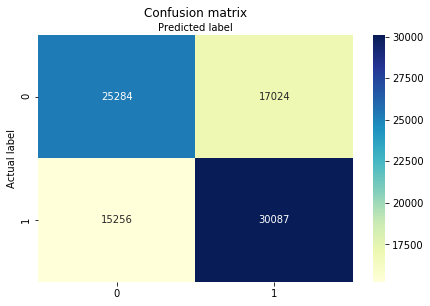

In [227]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Results from the model

$\bullet$ true positives (TP): 25431 have beeen predicted at true positives.

$\bullet$true negatives (TN): 16877 have beeen predicted at true negatives.

$\bullet$false positives (FP):  15244 have beeen predicted at false positives.

$\bullet$false negatives (FN): 30099 have beeen predicted at false negatives.


In [228]:
print("Accuracy of the model:",metrics.accuracy_score(Y_test, y_pred))
print("Precision of the model:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy of the model: 0.6317212581716124
Precision of the model: 0.6386406571713612
Recall: 0.6635423328848995


# ROC and AUC metrics

AUC gives the rate of successful classification by the logistic model.

Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

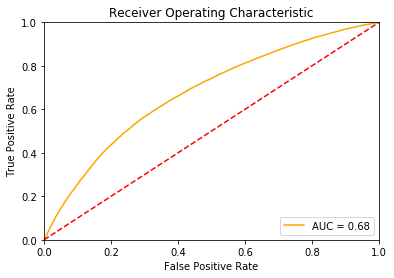

In [229]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(Y_test, probabilities)    

## Computing a weighted model

The accuracy computed is too small for this prediction and by making an analysis on the confusion model, we observe that so many errors occur during the training process. One approach to these problems is to weight the classes when computing the logistic regression model. The code in the cell below adds a `class_weight` argument to the call to the `LogisticRegression` function. In this case weights are chosen as $0.99, 0.99$  but you can also give another combination. 

In [0]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.99, 1:0.99}) 
logistic_mod.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight={0: 0.99, 1: 0.99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Next,  we execute the code in the cell below to compute and display the class probabilities for each case. 

In [0]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.56187667 0.43812333]
 [0.65600346 0.34399654]
 [0.38231298 0.61768702]
 [0.4377927  0.5622073 ]
 [0.69896658 0.30103342]
 [0.5542761  0.4457239 ]
 [0.51453428 0.48546572]
 [0.62750548 0.37249452]
 [0.72450872 0.27549128]
 [0.38053778 0.61946222]
 [0.44993989 0.55006011]
 [0.30659958 0.69340042]
 [0.6527069  0.3472931 ]
 [0.59381889 0.40618111]
 [0.66249708 0.33750292]]


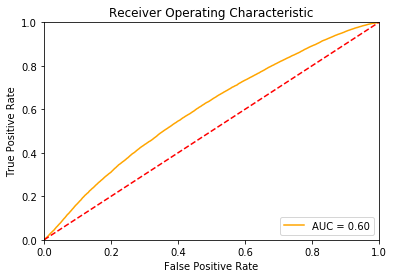

In [0]:
scores = score_model(probabilities, 0.5)
#print_metrics(Y_test, scores)  
plot_auc(Y_test, probabilities)  

#### After changing the weights of the two classes we almost obatined the same accuracy 

# Deep Learning Algorithm

After building a logistic regression model for the prediction of an accemotance of a mortgage, we built a deep learning model in order to compare the accuracy and select the solution for predicting this particular problem.

having proceed the feature selection process in the baseline model and important data visualization, we are going to build our model directly and the features jugjed unimportant are going to be removed directly.

In [0]:
scaled_X = StandardScaler().fit_transform(X)

### Splitting the data into training, validation and testing data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.20, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.3) # Same as we did for testing, we allocate 30% of the data is allocated to the validation

In [300]:
X_train.shape

(245422, 14)

In [301]:
Y_train.shape

(245422,)

In [302]:
X_test.shape

(87651, 14)

In [303]:
Y_test.shape

(87651,)

## Finding unique classes

In [304]:
classes = np.unique(Y_test)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


In [305]:
X_train

array([[-0.48697353, -0.19515638, -1.12440603, ...,  0.56996452,
        -0.87191195, -0.83144123],
       [-0.48697353, -0.19515638,  0.99382402, ...,  0.56996452,
        -0.20474209, -0.83144123],
       [-0.48697353, -0.19515638, -1.12440603, ...,  0.56996452,
        -0.66519866, -0.83144123],
       ...,
       [-0.48697353, -0.19515638, -1.12440603, ..., -0.17001236,
        -0.21239814, -0.83144123],
       [-0.48697353, -0.19515638,  0.99382402, ...,  0.56996452,
         0.6975778 , -0.83144123],
       [-0.48697353, -0.19515638,  0.99382402, ..., -0.79557085,
        -1.07315662, -0.83144123]])

## Task: Convert from categorical labels to one-hot encoded vectors

In this case there are 100 classes so we can tell the function to convert into a vector of length 2. You need to convert both the training, validation and testing targets.

In [0]:
Y_train = np_utils.to_categorical(Y_train, 2)
Y_test = np_utils.to_categorical(Y_test, 2)
Y_val = np_utils.to_categorical(Y_val, 2)

In [307]:
Y_val.shape

(105182, 2)

In [308]:
Y_train.shape

(245422, 2)

In [309]:
Y_test.shape

(87651, 2)

In [310]:
X_train.shape

(245422, 14)

# Building a deep learning model

The features of this problem were initially 21. However, the feature selection has been conducted and the observation made is that the two features "lender" and "applicant_ethnicity" have been removed in the prediction process. therefore, our model has 19 inputs.

The full process of the below code is done as follow:
    
1. Primarily, we defined the model as sequential in order to indicate the flow of the layers and Initializing the sequence means that whenever we add any layer to the model, it will be added in the sequence of left to right.

    
2. Second, we created a first layer of the model. the layer was defined with 19 inputs(features) and with 30 units for the hidden layer. The dense indicating that this is full connected and the activation function used is relu.


3. Third, we created a second layer technically called hidden layer with tanh activation function and no need of inputing again the features because the results from first layer will be transformed to the inputs of this new layer.


4. Fourth, we created the final layer and we applied the softmax. the number 2 indicate that we have 2 classes in our target.


 The aim of this softmax is to print the probabilities which will help in determining the accuracy of the model.
 
 At last, we compiled the model using the 'categorical_crossentropy' loss function


In [0]:
def network():
  
    
    model = Sequential() # 
    
    model.add(Dense(30, input_dim=14, activation='relu'))  

    model.add(Dense(10, activation='tanh')) 

    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

# Initialise the model

In [0]:
model=network()

## Printing the paramaters of the model

In [317]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                450       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 22        
Total params: 782
Trainable params: 782
Non-trainable params: 0
_________________________________________________________________


In [318]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), 
                    epochs=50, 
                    batch_size=30, 
                    verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 245422 samples, validate on 105182 samples
Epoch 1/50





245422/245422 [==============================] - 13s 54us/step - loss: 0.6313 - acc: 0.6491 - val_loss: 0.6255 - val_acc: 0.6536
Epoch 2/50
245422/245422 [==============================] - 14s 56us/step - loss: 0.6223 - acc: 0.6576 - val_loss: 0.6220 - val_acc: 0.6572
Epoch 3/50
245422/245422 [==============================] - 12s 51us/step - loss: 0.6188 - acc: 0.6611 - val_loss: 0.6206 - val_acc: 0.6586
Epoch 4/50
245422/245422 [==============================] - 12s 50us/step - loss: 0.6170 - acc: 0.6624 - val_loss: 0.6189 - val_acc: 0.6602
Epoch 5/50
245422/245422 [==============================] - 12s 50us/step - loss: 0.6162 - acc: 0.6629 - val_loss: 0.6182 - val_acc: 0.6616
Epoch 6/50
245422/245422 [==============================] - 13s 51us/step - loss: 0.6157 - acc: 0.6640 - val_loss: 0.6190 - val_acc: 0.6611
Epoch 

# Validation process

In [0]:
prediction_classes = model.predict_classes(X_val)

# Model Evaluation using Confusion Matrix

In [320]:
confusion_matrix(np.argmax(Y_val,1), prediction_classes)

array([[30236, 20332],
       [15061, 39553]])

## Printing the accuracy of the model

In [321]:
accuracy_score(np.argmax(Y_val,1), prediction_classes)

0.6635070639463025

In [0]:
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['acc'])
    plt.plot(h['val_acc'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

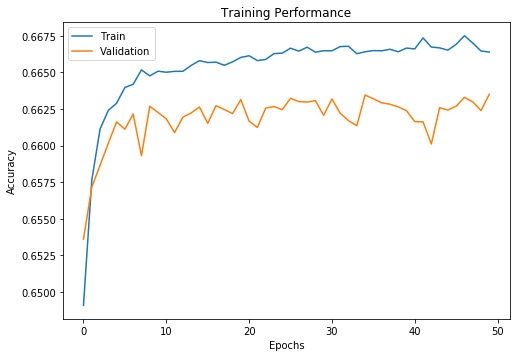

In [325]:
plot_hist(history.history, xsize=8, ysize=12)

# Evaluate the model

Evaluating is done on a data that the model has not seen before in order to predict how efficient the model will be in the real world or on real problems.

Ideally, the aim of splitting the data into the training, validation and testing data is enable this process of testing the model. While the validation data helps to run over and over the training models in order to select the model with high accuracy or better predictions, the testing data indeed has a huge task which is to evakuate the model selected during the validation phase.

In [0]:
prediction_classes_test = model.predict_classes(X_test)

## Visualizing the confusion matrix

In [333]:
confusion_matrix(np.argmax(Y_test,1), prediction_classes_test)

array([[25302, 16855],
       [12711, 32783]])

## Printing the accuracy of the model

In [334]:
accuracy_score(np.argmax(Y_test,1), prediction_classes_test)

0.6626849665149285

You can see that the accuracy on training and test sets is pretty similar which means that our model is not overfitting.

# Challenges we faced.

The most notable challenge we faced was to find the right dataset for the problems. We started with the problem of traffic but during our predictions, our model was overfitting because we were getting a 100% accuracy which is unrealistic for a machine learning classical algorithm even for the deep learning algroithm. We tried to remove the missing values from the data and percentage of the samples removed exceeded 10% moving from 283285 to around 3200 samples. We judged this critical that we decided to move to another problem.

We worked on the mortgage problem as described in the report introduction. The data was already encoded to numerical, and therefore we performed the scalong directly. 

All our attempts to improve the accuracy beyond 70% were futile. 

In our prediction we did not consider the feauture **lender** due to 
high amount of missing data. Moreover, having used the backward elimination in ensuring the best feature selection, the feature application_ethnicity was also removed from the predictions test.

# Deep learning vs logistic regresion 

method gives significantly higher accuracy than the "classical" methods

Deep learning has  a better accuracy 67%.

The model from machine learning give us an accuracy arround to 63%.


Deep learning was easier to impliment and took a shorter time.

